Please ensure the Anaconda environment is properly configured before running the code to ensure that the libraries and tool versions are correct and compatible, which helps the code run smoothly.

You can configure according to the tutorial in this link：
https://omqeyq5a7p.feishu.cn/wiki/XmSFwXm5NiSEfuk72BJc1yyQnub

In [1]:

# A brief introduction to Convolutional Neural Networks (CNN)

# 1. Convolutional Layer
# - The convolutional layer is the core component of CNN, using convolutional kernels (filters) that slide over the input data to extract local features.
# - The convolution operation helps capture low-level features of the image (like edges, corners, textures) while reducing computational cost.
# - The size of the filter and the stride determine the range of feature extraction and the size of the output feature map.

# 2. Activation Function
# - Commonly used activation function is ReLU (Rectified Linear Unit), which sets all negative values to 0 and retains positive values.
# - The activation function introduces non-linearity into the model, allowing CNN to learn more complex features.

# 3. Pooling Layer
# - The pooling layer is used to reduce the dimensionality of the feature maps, with common techniques being max pooling and average pooling.
# - Pooling reduces the number of parameters and computations while preserving the most important features.
# - Max pooling is often used to extract the strongest features in a local region, such as edges in an image.

# 4. Fully Connected Layer
# - The fully connected layer is used to flatten the high-dimensional features extracted by the convolutional and pooling layers and map them to the output labels.
# - Neurons in this layer are connected to all outputs of the previous layer, which is used for classification or regression tasks.

# CNNs are well-suited for tasks like image classification and object detection, especially due to their efficiency in handling image data through weight sharing and local connections.



In [2]:
# A typical CNN structure is shown in the following figure

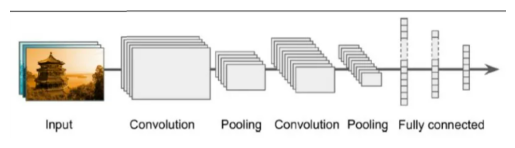

In [3]:
from PIL import Image  # Import the PIL library
import matplotlib.pyplot as plt

# Load the local image
img = Image.open('pic/cnn_str.png')  

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Turn off the axis
plt.show()

In [4]:
# """
# The above is a brief introduction to of CNN, 
# which may not seem easy to understand. 

# Next, we will attempt to use CNN through an experiment 
# to understand its role in image processing tasks.

# But before attempting to use CNN for experiments, 
# we need to figure out a few questions first.
# """


In [5]:
#Question 1: What is convolutional kernel?

In [6]:
# """
# The working principle of a convolutional kernel (filter) in Convolutional Neural Networks (CNN):

# 1. Local Feature Extraction:
#    - A convolutional kernel is a small matrix (commonly 2x2, 3x3, or 5x5) used to scan local regions of the input image.
#    - The kernel performs element-wise multiplication with the local area of the image and then sums the results. This is essentially a weighted sum of the local region.

# 2. Sliding Window:
#    - The kernel slides across the image using a "sliding window" technique with a defined stride.
#    - Each time the kernel moves, it computes a new value for the output, which forms the **feature map**.

# 3. Feature Detection:
#    - Different convolutional kernels detect different features, such as edges, textures, or corners.
#    - For example, one kernel may highlight horizontal edges, while another may detect vertical edges.

# 4. Reducing Parameters and Improving Efficiency:
#    - The kernel only connects to a local region of the input, which significantly reduces the number of parameters, making the model more efficient.
#    - By using "weight sharing," the same kernel is applied across different parts of the image to extract similar features, improving computational efficiency.

# In summary:
# The convolutional kernel extracts features from the input image by performing weighted operations on local regions and then passing these features to the next layer of the network for tasks such as classification or recognition.
# """


In [7]:
#Next, we will use a small example to help understand the working process of convolutional kernels

In [8]:
import torch
import torch.nn as nn
import numpy as np

# Define a new input tensor (image)
input_tensor_example = np.array([[1, 1, 1, 0, 0],
                                 [0, 1, 1, 1, 0],
                                 [0, 0, 1, 1, 1],
                                 [0, 0, 1, 1, 0],
                                 [0, 1, 1, 0, 0]])

# Define a 3x3 convolutional kernel (filter)
conv_kernel_example = np.array([[1, 0, 1],
                                [0, 1, 0],
                                [1, 0, 1]])

# Create a convolutional layer using PyTorch with 3x3 kernel size
conv_layer_example = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=0, bias=False)

# Set the convolutional kernel weights (PyTorch expects [out_channels, in_channels, height, width])
with torch.no_grad():
    conv_layer_example.weight = torch.nn.Parameter(torch.tensor(conv_kernel_example, dtype=torch.float32).unsqueeze(0).unsqueeze(0))

# Convert input tensor to a PyTorch tensor and add batch and channel dimensions
input_tensor_pytorch = torch.tensor(input_tensor_example, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

# Apply the convolutional layer to the input tensor
output_example = conv_layer_example(input_tensor_pytorch)

# Detach and convert the output back to a NumPy array for easier visualization
output_image_example = output_example.detach().squeeze().numpy()

# Print input tensor, convolution kernel, and output result
print("Input Tensor (5x5):\n", input_tensor_example)
print("\nConvolution Kernel (3x3):\n", conv_kernel_example)
print("\nOutput after Convolution:\n", output_image_example)


Input Tensor (5x5):
 [[1 1 1 0 0]
 [0 1 1 1 0]
 [0 0 1 1 1]
 [0 0 1 1 0]
 [0 1 1 0 0]]

Convolution Kernel (3x3):
 [[1 0 1]
 [0 1 0]
 [1 0 1]]

Output after Convolution:
 [[4. 3. 4.]
 [2. 4. 3.]
 [2. 3. 4.]]


In [9]:
#The working process of the convolution kernel in the above code is shown in the following figure

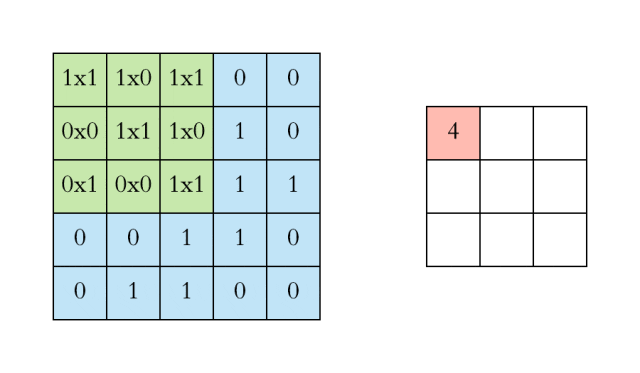

In [10]:
from IPython.display import Image
from IPython.display import display


gif_path = 'pic/conv_kernel.gif'

#Show GIF
display(Image(filename=gif_path))

In [11]:
#Next, let's take an actual image as an example to observe the role of convolutional kernels

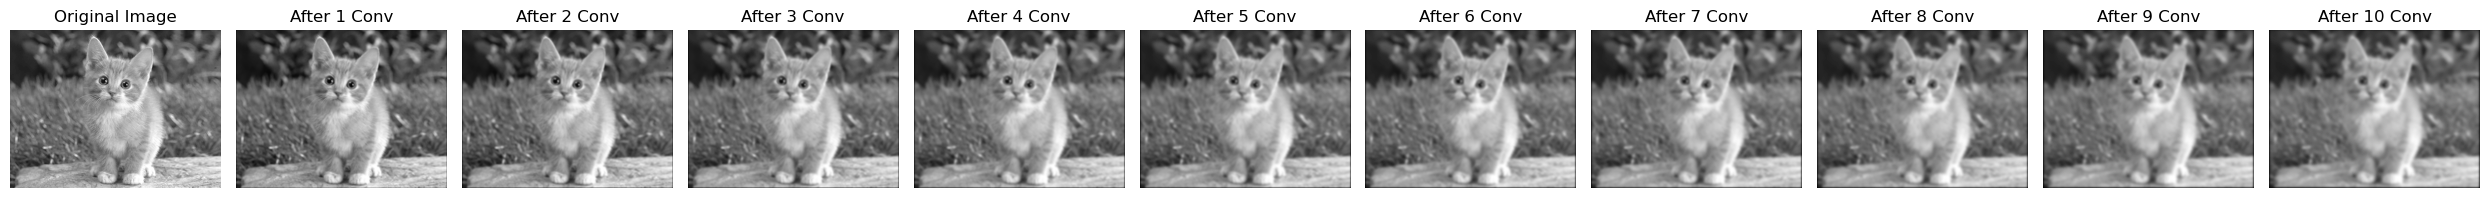

In [12]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from PIL import Image  # Import Image from the PIL library
import numpy as np

# Load the image and convert it to grayscale
img = Image.open('pic/cat.png').convert('L')  # Replace with your image path
img_np = np.array(img)

# Convert the image to a torch tensor and add batch and channel dimensions
img_tensor = torch.tensor(img_np, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

# Define the convolution kernel
kernel = torch.tensor([[1, 0, 1], 
                       [0, 1, 0], 
                       [1, 0, 1]], dtype=torch.float32).unsqueeze(0).unsqueeze(0)

# Prepare to display the images
fig, axs = plt.subplots(1, 11, figsize=(25, 5))  # 10 convolution rounds + original image

# Display the original image
axs[0].imshow(img_np, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

# Perform 10 rounds of convolution
current_tensor = img_tensor
for i in range(10):
    # Apply the convolution operation
    conv_result = F.conv2d(current_tensor, kernel, padding=1)
    
    # Convert the result of the convolution to a numpy array
    conv_img = conv_result.squeeze().detach().numpy()
    
    # Display the image after each convolution
    axs[i + 1].imshow(conv_img, cmap='gray')
    axs[i + 1].set_title(f'After {i + 1} Conv')
    axs[i + 1].axis('off')
    
    # Update the current tensor to the result of the convolution
    current_tensor = conv_result

plt.tight_layout()
plt.show()


In [13]:

# It seems that cat is becoming more blurred,that's because the convolution kernel we're using is:
# [1, 0, 1]
# [0, 1, 0]
# [1, 0, 1]
# This convolution kernel performs a weighted summation operation on the image, which doesn't emphasize sharpening or edge detection. 
# Instead, it fuses the information of neighboring pixels, causing the image to become more blurred. 
# This happens because the convolution kernel averages the values of multiple pixels in the neighborhood, gradually reducing detail.

# ### Why do we still use convolution?
# Convolution is a core operation in **neural networks**, especially **convolutional neural networks (CNNs)**. 
# The purpose of convolution is to extract local features of an image, such as edges, corners, and textures. 
# By using different combinations of convolution kernels and hierarchical convolution operations, CNNs can learn high-level features, 
# allowing them to perform well on complex tasks like image classification and object detection.

# Here are some common uses of convolution kernels:

# 1. **Edge detection**:
#    [-1, -1, -1]
#    [-1,  8, -1]
#    [-1, -1, -1]
#    This convolution kernel is used to highlight edges in the image and emphasize contours.

# 2. **Blurring**:
#    [1, 1, 1]
#    [1, 1, 1]
#    [1, 1, 1]
#    This convolution kernel will blur the image because it averages pixel values, making the details less noticeable.

# 3. **Sharpening**:
#    [ 0, -1,  0]
#    [-1,  5, -1]
#    [ 0, -1,  0]
#    This convolution kernel can enhance details in the image, making the edges more prominent and the image look sharper.

# ### The role of convolution in CNNs:
# 1. **Low-level feature extraction**: The initial convolution layers extract basic features of the image, such as edges and corners.
# 2. **High-level feature extraction**: As the network deepens, the convolution kernels become more complex, 
#    enabling the recognition of higher-level features like object shapes and patterns.
# 3. **Downsampling**: Some convolution kernels (e.g., 3x3 with all ones) can be used for downsampling the image, 
#    reducing resolution to save computational costs while preserving key information.

# Therefore, while the result you're seeing now may look blurred, a convolutional neural network will adaptively learn 
# which convolution kernels to use to extract useful features, enabling it to perform more complex tasks.



In [14]:
#Question 2: What is activation function?

In [15]:
# 
# An activation function is a mathematical function introduced into a neural network to add non-linearity. 
# It operates on the output of each neuron and allows the network to learn and represent complex patterns and features.

# ### Why do we need activation functions:
# 1. **Introducing Non-linearity**:
#    Without activation functions, all layers in the neural network would be linear combinations, 
#    making it unable to handle complex non-linear problems. By adding an activation function, 
#    the network can learn non-linear relationships in the data, enabling it to solve more complex tasks.

# 2. **Regulating the Output**:
#    Activation functions can limit the output of neurons within a specific range, such as [0, 1] or [-1, 1], 
#    which helps with gradient calculations and prevents issues like vanishing or exploding gradients.

# 3. **Different tasks require different activation functions**:
#    Common activation functions include ReLU, Sigmoid, and Tanh. Each activation function has different performance depending on the task.
# 

In [16]:
#Next, we will take the RELU function as an example to show the role of the activation function

In [17]:
import torch
import torch.nn as nn

# Assume there is a set of input data
input_data = torch.tensor([-1.0000,  0.0000,  1.0000,  2.0000, -0.5000], dtype=torch.float32)

# Use the ReLU activation function
relu = nn.ReLU()

# Apply the activation function
output_data = relu(input_data)

# Print the output result
print("Input data:", input_data)
print("Output data after ReLU:", output_data)


Input data: tensor([-1.0000,  0.0000,  1.0000,  2.0000, -0.5000])
Output data after ReLU: tensor([0., 0., 1., 2., 0.])


In [18]:
#In this example, the negative values in the input data are set to 0 by the ReLU activation function, 
#while the positive values remain unchanged. This non-linear operation allows the neural network to handle complex patterns.

In [19]:
#In addition to the RELU function, we also need to understand another very important activation function, the Softmax function

In [20]:
# """
# Softmax is an activation function commonly used in the output layer of neural networks, 
# especially in multi-class classification tasks. Its purpose is to convert the network's outputs 
# (usually unnormalized scores, referred to as logits) into a probability distribution. 
# Each output value is transformed into a probability value between 0 and 1, 
# and the total sum of all output probabilities is 1.

# ### Why is Softmax needed:
# 1. **Probability Output**:
#    Softmax converts the network's outputs into a probability distribution, 
#    making the model's output more intuitive and suitable for multi-class tasks. 
#    For example, if the model outputs `[0.2, 0.5, 0.3]`, it indicates that the model believes 
#    the input most likely belongs to the second class.

# 2. **Differentiability**:
#    Softmax is differentiable, meaning it is suitable for backpropagation in neural networks, 
#    allowing model parameters to be optimized through gradient descent.

# 3. **Standard Choice for Multi-class Problems**:
#    In multi-class tasks (e.g., identifying whether an image is a cat, dog, or bird), 
#    Softmax is the standard choice for the output layer, as it ensures the output is a valid probability distribution.
# """

In [21]:
#Similarly, we also use a simple example to demonstrate the function of Softmax

In [22]:
import torch
import torch.nn as nn

# Assume there is a set of unnormalized classification scores (logits)
logits = torch.tensor([2.0, 1.0, 0.1])

# Use the Softmax function
softmax = nn.Softmax(dim=0)  # dim=0 indicates applying Softmax along the 0th dimension
probabilities = softmax(logits)

# Print the output probability distribution
print("Logits (raw scores):", logits)
print("Probabilities after Softmax:", probabilities)

Logits (raw scores): tensor([2.0000, 1.0000, 0.1000])
Probabilities after Softmax: tensor([0.6590, 0.2424, 0.0986])


In [23]:
# It can be seen that the output of the network is [2.0, 1.0, 0.1], 
# and these values are unnormalized scores that cannot be directly 
# explained as probabilities. 

# We used Softmax to convert it into a probability distribution, 
# representing the probability values of each class. 

# The total probability of the output is 1. 

# The output of Softmax is [0.659, 0.242, 0.099], indicating that 
# the model considers the input to have the highest probability of 
# belonging to the first category.


In [24]:
#Question 3: What is pooling layer?

In [25]:

# A pooling layer is a layer in a convolutional neural network (CNN) that reduces the spatial dimensions (height and width) of the input feature map. 
# The main purpose of pooling layers is to downsample the input data, reducing the number of parameters and computation, 
# while retaining important features for further processing.

# ### Why do we need pooling layers:
# 1. **Dimensionality Reduction**:
#    Pooling layers reduce the input size, thereby lowering the number of parameters and computational cost. 
#    It also helps to simplify the model, preventing overfitting.

# 2. **Translation Invariance**:
#    Pooling layers make the model more robust to small translations of the input image, 
#    focusing on the most important features and ignoring minor shifts.

# 3. **Noise Reduction**:
#    By summarizing features in small regions, pooling layers can reduce the effect of noisy data or irrelevant details.

# ### Common types of pooling:
# 1. **Max Pooling**:
#    Max pooling selects the maximum value from the pooling window, preserving the most prominent features.
   
# 2. **Average Pooling**:
#    Average pooling takes the average value from the pooling window, suitable for smoothing feature maps and retaining overall information.



In [26]:
#Next, we will use an example to show the role of the pooling layer

In [27]:
import torch
import torch.nn as nn

# Assume there is a 4x4 input image
input_tensor = torch.tensor([[[[1.0, 2.0, 2.0, 2.0],
                               [3.0, 4.0, 4.0, 2.0],
                               [1.0, 1.0, 3.0, 3.0],
                               [1.0, 1.0, 3.0, 3.0]]]])

# Define a 2x2 max pooling layer
max_pool = nn.MaxPool2d(kernel_size=2)
# Define a 2x2 average pooling layer
avg_pool = nn.AvgPool2d(kernel_size=2)

# Apply max pooling
output_tensor1 = max_pool(input_tensor)
# Apply average pooling
output_tensor2 = avg_pool(input_tensor)

# Print the results
print("Input Tensor:")
print(input_tensor)
print("Output Tensor after Max Pooling:")
print(output_tensor1)
print("Output Tensor after Average Pooling:")
print(output_tensor2)


Input Tensor:
tensor([[[[1., 2., 2., 2.],
          [3., 4., 4., 2.],
          [1., 1., 3., 3.],
          [1., 1., 3., 3.]]]])
Output Tensor after Max Pooling:
tensor([[[[4., 4.],
          [1., 3.]]]])
Output Tensor after Average Pooling:
tensor([[[[2.5000, 2.5000],
          [1.0000, 3.0000]]]])


In [28]:
#The working process of the pooling layer in the above code are shown in the following figures

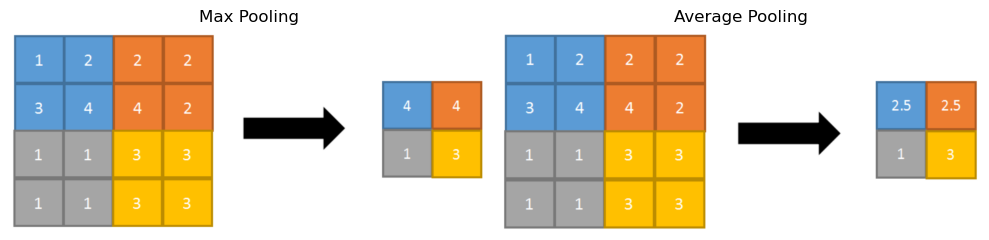

In [29]:
from PIL import Image  # Import Image module from PIL library
import matplotlib.pyplot as plt

# Load two local images, replace with your image paths
img1 = Image.open('pic/pool_max.png')
img2 = Image.open('pic/pool_avg.png')

# Create a canvas with 1 row and 2 columns to display two images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display the first image
axs[0].imshow(img1)
axs[0].axis('off')  # Turn off the axis
axs[0].set_title('Max Pooling')  # Set the title for the first image

# Display the second image
axs[1].imshow(img2)
axs[1].axis('off')  # Turn off the axis
axs[1].set_title('Average Pooling')  # Set the title for the second image

# Adjust the layout to avoid overlap and display the images
plt.tight_layout()
plt.show()

In [30]:
#It can be seen that the maximum or average value among the four regions is extracted through the pooling layer, forming a smaller feature map

In [31]:
##Question 4: What is pooling layerFully Connected Layer?

In [32]:
# """
# The fully connected layer (Fully Connected Layer) is a type of layer in neural networks where each neuron is connected to all neurons in the previous layer. 
# In a fully connected layer, the input undergoes a linear transformation via a weight matrix, followed by a non-linear transformation through an activation function, 
# producing new features as output.

# ### Why we need fully connected layers:
# 1. **Information integration**:
#    After operations in convolutional layers and pooling layers, local information from the feature map is extracted. 
#    The fully connected layer integrates these extracted features and combines them with all input features, assisting in the final classification or regression.

# 2. **Classification decisions**:
#    Fully connected layers map the high-level features extracted to output categories. 
#    For example, in image classification tasks, the fully connected layer converts the feature map into specific classification results.

# 3. **Adjustable parameters**:
#    Fully connected layers have a large number of trainable parameters (weights and biases). 
#    These parameters can learn complex feature patterns through training, thereby improving the network's performance.
# """


In [33]:
import torch
import torch.nn as nn

# Assume there is a set of input data
input_data = torch.randn(1, 16)  # 1 sample, 16 input features

# Define a fully connected layer
fc = nn.Linear(16, 4)  # 16 input features, 4 output features

# Pass the input data through the fully connected layer
output_data = fc(input_data)

# Print the input and output
print("Input data:")
print(input_data)
print("Output data after fully connected layer:")
print(output_data)


Input data:
tensor([[ 0.8498,  0.4687,  0.6149,  0.3708,  1.0588, -2.6169, -0.8661, -0.0976,
         -0.4045, -1.4870,  1.3136, -0.2390,  0.5647,  1.4639,  0.8182, -2.6085]])
Output data after fully connected layer:
tensor([[ 0.3922, -0.4195,  0.6650,  0.6882]], grad_fn=<AddmmBackward0>)


In [34]:
#We can see that the 16 dimensional input has been reduced to 4 dimensions

In [35]:
#Now that we have a preliminary understanding of several key components in CNN, we can begin our experimental phase

In [36]:
# """
# Task: CNN for MNIST Digit Recognition

# In this task, we aim to build a Convolutional Neural Network (CNN) to recognize handwritten digits from the MNIST dataset. 
# The MNIST dataset contains 60,000 training images and 10,000 test images, where each image is a 28x28 grayscale picture 
# of a digit from 0 to 9.

# ### Objectives:
# 1. **Preprocessing**:
#    The images are normalized and converted into a format that the CNN can process. Each pixel value is scaled between 0 and 1.

# 2. **Building the CNN**:
#    The CNN will have multiple layers including convolutional layers, pooling layers, and fully connected layers. 
#    The convolutional layers will extract important features such as edges, corners, and patterns from the digit images.

# 3. **Training the Model**:
#    The CNN will be trained on the 60,000 training images. We will use backpropagation and optimization techniques 
#    like stochastic gradient descent (SGD) or Adam to minimize the classification error.

# 4. **Evaluation**:
#    After training, the model will be evaluated on the 10,000 test images. The goal is to achieve high accuracy 
#    in predicting the correct digit for each test image.

# 5. **Softmax for Classification**:
#    The final fully connected layer will output scores for 10 classes (digits 0-9). 
#    The Softmax function will be applied to convert these scores into probabilities, 
#    and the class with the highest probability will be selected as the predicted digit.

# ### Key Steps:
# - Load and preprocess the MNIST dataset.
# - Build a CNN architecture consisting of convolutional, pooling, and fully connected layers.
# - Train the CNN on the training dataset and evaluate its performance on the test dataset.
# - Use Softmax to output a probability distribution for the predicted digits.
# """


In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Data preprocessing and loading
# Use torchvision's transforms module to normalize the data, scaling pixel values between [0, 1]
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the MNIST training and test datasets
trainset = torchvision.datasets.MNIST(root='./mnist', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./mnist', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./mnist\MNIST\raw\train-images-idx3-ubyte.gz to ./mnist\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./mnist\MNIST\raw\train-labels-idx1-ubyte.gz to ./mnist\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./mnist\MNIST\raw\t10k-images-idx3-ubyte.gz to ./mnist\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting ./mnist\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./mnist\MNIST\raw



In [38]:
# 2. Build the CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Define the first convolutional layer: 1 input channel (grayscale), 32 output channels, kernel size 3x3
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        # Define the second convolutional layer: 32 input channels, 64 output channels, kernel size 3x3
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        # Define the max pooling layer, with a pooling window of 2x2
        self.pool = nn.MaxPool2d(2, 2)
        # Fully connected layer: flattens the feature map (64x7x7), inputs 64*7*7, outputs 128
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        # The final fully connected layer, inputs 128, outputs 10 (representing digits 0-9)
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        # Pass through the first convolutional layer and ReLU activation, then through pooling
        x = self.pool(torch.relu(self.conv1(x)))
        # Pass through the second convolutional layer and ReLU activation, then through pooling
        x = self.pool(torch.relu(self.conv2(x)))
        # Flatten the data for the fully connected layers
        x = x.view(-1, 64 * 7 * 7)
        # Pass through the first fully connected layer and ReLU activation
        x = torch.relu(self.fc1(x))
        # Pass through the final fully connected layer, outputting scores for 10 classes (unnormalized)
        x = self.fc2(x)
        return x

# Instantiate the CNN model
model = SimpleCNN()

In [39]:
# 3. Define the loss function and optimizer
# Use cross-entropy loss (CrossEntropyLoss) and Adam optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# 4. Train the CNN model
n_epochs = 5  # Set the number of training epochs
print('Training begins')
for epoch in range(n_epochs):
    running_loss = 0.0
    for images, labels in trainloader:
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        
        # Compute the loss
        loss = criterion(outputs, labels)
        
        # Backward pass
        loss.backward()
        
        # Optimize the weights
        optimizer.step()
        
        # Accumulate the loss+
        running_loss += loss.item()
    
    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}")

print("Training finished.")

Training begins
Epoch 1, Loss: 0.16640181866869616


In [ ]:
# 5. Test the CNN model
correct = 0
total = 0

# Do not compute gradients (faster inference)
with torch.no_grad():
    for images, labels in testloader:
        # Forward pass
        outputs = model(images)
        # Predicted class is the one with the highest score
        _, predicted = torch.max(outputs, 1)
        # Count correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test dataset: {100 * correct / total:.2f}%')

In [ ]:
# 6. Randomly select ten test samples and their predictions
import random

# Get all test images and labels
dataiter = iter(testloader)
images, labels = next(dataiter)

# Randomly select 10 unique indices
indices = random.sample(range(len(images)), 10)

# Get predictions for the selected images
with torch.no_grad():
    outputs = model(images)  # Forward pass through the model
    _, predicted = torch.max(outputs, 1)  # Get the predicted labels

# Display the randomly selected images and their predicted labels
plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    # Display each randomly selected image
    plt.subplot(2, 5, i + 1)  # Create a 2x5 grid of subplots
    plt.imshow(images[idx].numpy().squeeze(), cmap='gray')
    plt.title(f'Predicted: {predicted[idx].item()}\nTrue: {labels[idx].item()}')  # Show predicted and true labels
    plt.axis('off')  # Turn off the axis

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
